# My Firsrt Convolutional Neural Network: CIFAR-10

## Data Loading

In [1]:
# Import LIbrary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras

In [2]:
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()

print('train_x.shape:', train_x.shape)
print('train_y.shape:', train_y.shape)
print('test_x.shape:', test_x.shape)
print('test_y.shape:', test_y.shape)

170498071/170498071 [==============================] - 3s 0us/step
train_x.shape: (50000, 32, 32, 3)
train_y.shape: (50000, 1)
test_x.shape: (10000, 32, 32, 3)
test_y.shape: (10000, 1)


**labeling**

In [3]:
labels = {
    0 : 'Airplane',
    1 : 'Automobile',
    2 : 'Bird',
    3 : 'Cat',
    4 : 'Deer',
    5 : 'Dog',
    6 : 'Frog',
    7 : 'Horse',
    8 : 'Ship',
    9 : 'Truck'
}

print(labels)

{0: 'Airplane', 1: 'Automobile', 2: 'Bird', 3: 'Cat', 4: 'Deer', 5: 'Dog', 6: 'Frog', 7: 'Horse', 8: 'Ship', 9: 'Truck'}


**Image Check**

id : 4372
This image is Automobile


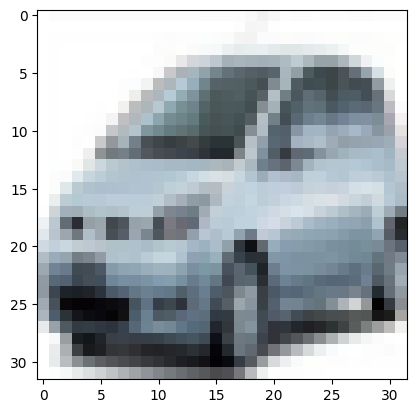

In [4]:
id = rd.randrange(0, 10000)

print(f'id : {id}')
print(f'This image is {labels[test_y[id][0]]}')
plt.imshow(test_x[id])
plt.show()

## Preprocessing

**Standardization**

In [5]:
x_mean, x_std = train_x.mean(), train_x.std()

train_x = (train_x - x_mean) / x_std
test_x = (test_x - x_mean) / x_std

print(train_x.min())
print(train_x.max())

-1.8816433721538972
2.09341038199596


**One-Hot Encoding**

In [6]:
from tensorflow.keras.utils import to_categorical

n_class = len(np.unique(train_y))

train_y = to_categorical(train_y, n_class)
test_y = to_categorical(test_y, n_class)

print('train_y.shape:', train_y.shape)
print('test_y.shape:', test_y.shape)

train_y.shape: (50000, 10)
test_y.shape: (10000, 10)


## Modeling

In [7]:
# Import Library
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.backend import clear_session

In [8]:
# Session Clear
clear_session()

# Layer
X = Input(shape=(32, 32, 3))

H = Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(X)
H = Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(H)
H = BatchNormalization()(H)
H = MaxPool2D(pool_size=(2,2), strides=(2,2))(H)
H = Dropout(0.25)(H)

H = Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu')(H)
H = Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu')(H)
H = BatchNormalization()(H)
H = MaxPool2D(pool_size=(2,2), strides=(2,2))(H)
H = Dropout(0.25)(H)

H = Flatten()(H)
H = Dense(1024, activation='relu')(H)
H = BatchNormalization()(H)
H = Dropout(0.35)(H)

Y = Dense(10, activation='softmax')(H)

# Weave Layer
model = Model(X, Y)

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0     

In [9]:
# Early Stopping
from tensorflow.keras.callbacks import EarlyStopping

early = EarlyStopping(monitor='val_loss',
                      min_delta=0,
                      patience=3,
                      verbose=1,
                      restore_best_weights=True)

In [10]:
# Train
hist = model.fit(train_x, train_y,
          epochs=10000,
          validation_split=0.2,
          callbacks=[early])

Epoch 1/10000
1250/1250 [==============================] - 23s 8ms/step - loss: 1.6107 - accuracy: 0.4709 - val_loss: 1.2033 - val_accuracy: 0.5886
Epoch 2/10000
1250/1250 [==============================] - 9s 7ms/step - loss: 1.0896 - accuracy: 0.6181 - val_loss: 0.9783 - val_accuracy: 0.6637
Epoch 3/10000
1250/1250 [==============================] - 9s 7ms/step - loss: 0.9149 - accuracy: 0.6811 - val_loss: 1.0770 - val_accuracy: 0.6616
Epoch 4/10000
1250/1250 [==============================] - 9s 7ms/step - loss: 0.8203 - accuracy: 0.7140 - val_loss: 0.8436 - val_accuracy: 0.7143
Epoch 5/10000
1250/1250 [==============================] - 10s 8ms/step - loss: 0.7349 - accuracy: 0.7434 - val_loss: 0.8869 - val_accuracy: 0.7138
Epoch 6/10000
1250/1250 [==============================] - 10s 8ms/step - loss: 0.6627 - accuracy: 0.7695 - val_loss: 0.7112 - val_accuracy: 0.7667
Epoch 7/10000
1250/1250 [==============================] - 9s 7ms/step - loss: 0.5958 - accuracy: 0.7915 - val_loss

## Evaluate

In [12]:
performance_test = model.evaluate(test_x, test_y, batch_size=100)

print(f'Test Loss: {performance_test[0]:.3f}, Test Accuracy: {performance_test[1]*100:.3f}')

100/100 [==============================] - 1s 6ms/step - loss: 0.6505 - accuracy: 0.7935
Test Loss: 0.651, Test Accuracy: 79.350


**Visualize - Accuracy**

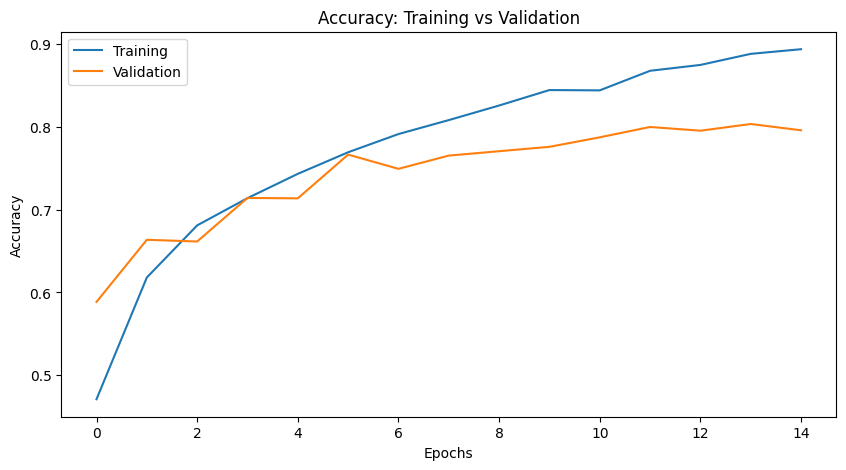

In [17]:
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

plt.figure(figsize=(10, 5))
plt.plot(accuracy, label='Training')
plt.plot(val_accuracy, label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy: Training vs Validation')
plt.show()

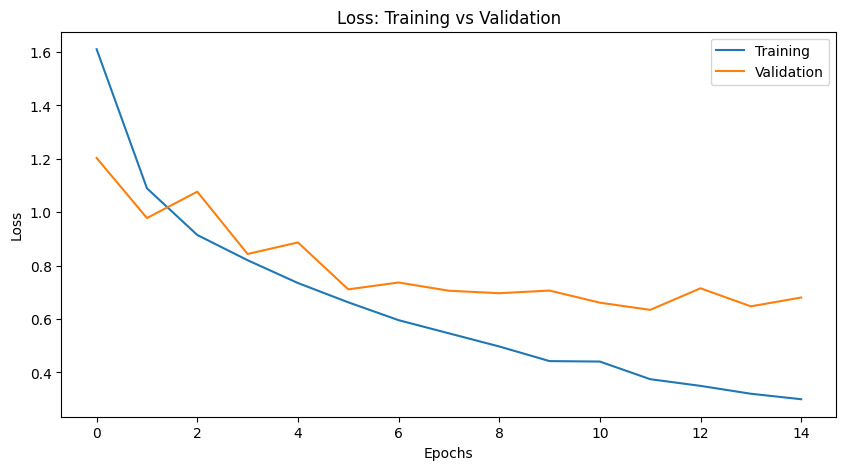

In [16]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.figure(figsize=(10, 5))
plt.plot(loss, label='Training')
plt.plot(val_loss, label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss: Training vs Validation')
plt.show()

## Predict

In [18]:
train_y = np.argmax(train_y, axis=1)
test_y = np.argmax(test_y, axis=1)

In [19]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

train_accuracy = accuracy_score(train_y, single_pred_train)
test_accuracy = accuracy_score(test_y, single_pred_test)

print('CNN')
print(f'Train Accuracy: {train_accuracy*100:.2f}%')
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

313/313 [==============================] - 1s 3ms/step
CNN
Train Accuracy: 93.53%
Test Accuracy: 79.35%


**Check Image and Prediction**

id : 1614
This Picture is Automobile.
Model's Prediction: Automobile
Model's categorical percentage:
{'Airplane': 0.0, 'Automobile': 99.0, 'Bird': 0.0, 'Cat': 0.0, 'Deer': 0.0, 'Dog': 0.0, 'Frog': 0.0, 'Horse': 0.0, 'Ship': 0.0, 'Truck': 0.0}
Correct!


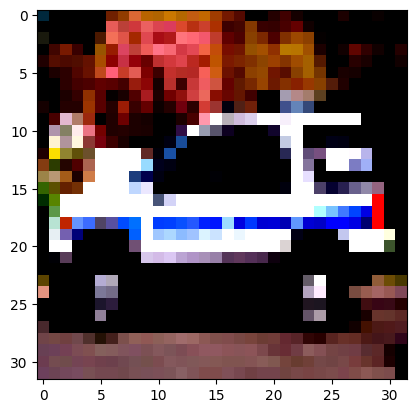

In [20]:
id = rd.randrange(0, 10000)

print(f'id : {id}')
print(f'This Picture is {labels[test_y[id]]}.')
print(f"Model's Prediction: {labels[single_pred_test[id]]}")

prob = np.floor(pred_test[id]*100).tolist()
prob_dict = {}

for idx, prob in enumerate(prob):
  prob_dict[labels[idx]] = prob

print(f"Model's categorical percentage:")
print(prob_dict)

if test_y[id] == single_pred_test[id]:
  print('Correct!')
else:
  print('Error!')

plt.imshow(test_x[id].reshape((32, 32, -1)))
plt.show()